# **Inside Look at Netflix's Content Strategy**

# **Importing Libraries**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

sns.set_style('darkgrid')

# **Data Loading and Initial Inspection**

In [58]:
df = pd.read_csv('/content/netflix_titles.csv')

In [59]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [60]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Interpretation of .info():

* We have 7787 entries (titles).
* Key Problem: The date_added column is of type object (a string), not a datetime object. We cannot perform time-based analysis until this is corrected.
* Missing Values: director, cast, country, date_added, and rating all have missing values. director has the most significant number of nulls.

In [62]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# **Data Cleaning and Transformation**

In [63]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [64]:
## 1. Handle missing values for 'Director' and 'Cast'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [65]:
## 2. Handling Country Column
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [66]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [67]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
df.dropna(subset=['date_added','rating'], inplace=True)

In [68]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [69]:
# 4. Convert 'date_added' to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',dayfirst=False)

In [70]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6344,s6345,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,2017-03-31,2012,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Richie Beckett is an aging Brighton crime boss...
3258,s3259,TV Show,Justin Time,Unknown,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2016-04-01,2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
4708,s4709,Movie,Outlawed,"Adam Collins, Luke Radford","Adam Collins, Jessica Norris, Ian Hitchens, St...",United Kingdom,2019-02-15,2018,TV-MA,102 min,Action & Adventure,"After a failed mission, an ex-Royal Marines Co..."
3773,s3774,Movie,Love Per Square Foot,Anand Tiwari,"Vicky Kaushal, Angira Dhar, Alankrita Sahai, R...",India,2018-02-14,2018,TV-14,133 min,"Comedies, International Movies, Romantic Movies","Individually, bank employees Sanjay and Karina..."
978,s979,Movie,Blind Date,Clovis Cornillac,"Mélanie Bernier, Clovis Cornillac, Lilou Fogli...",France,2016-10-15,2015,TV-14,91 min,"Comedies, International Movies, Music & Musicals",A passionate pianist and a soulful puzzle make...


In [71]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [72]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


# **Exploratory Data Analysis & Visualization**

**1. Distribution of content type**

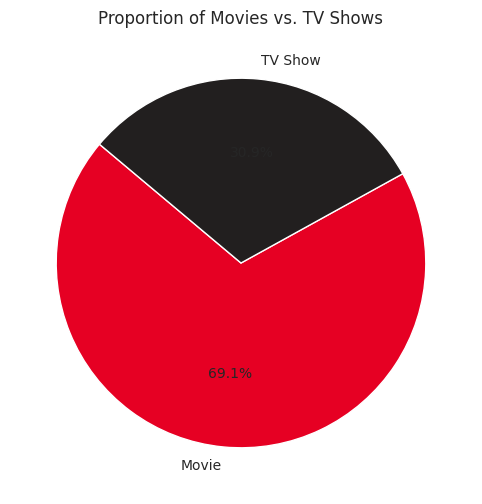

In [73]:
plt.figure(figsize=(8,6))
type_count = df['type'].value_counts()
plt.pie(type_count,labels=type_count.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

Insight: Movies dominate Netflix’s catalog: Roughly 70% of the titles are movies, while TV shows make up about 30%. This suggests Netflix’s library is heavily skewed toward films rather than series.

**2. Content Addition Trends Across Time**

<Figure size 1200x600 with 0 Axes>

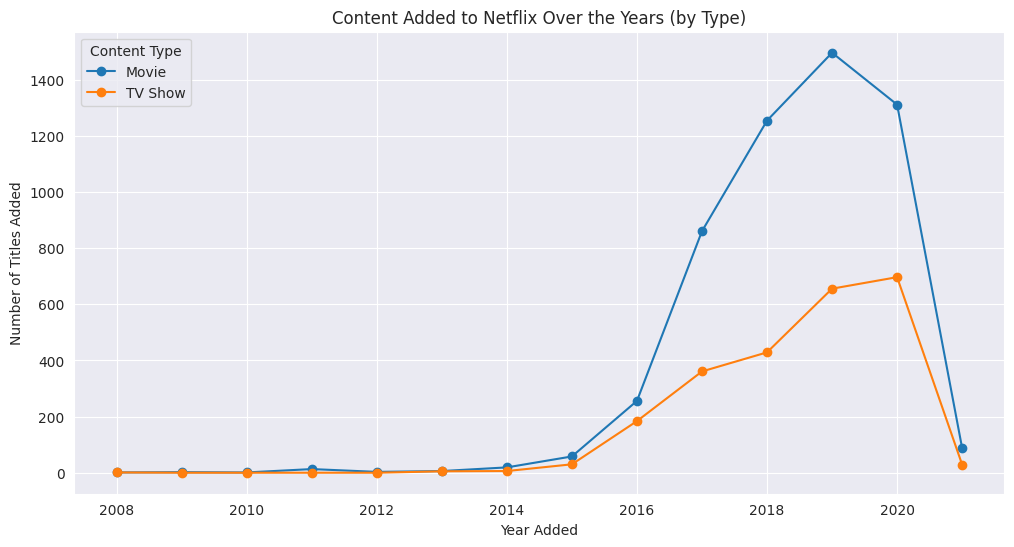

In [74]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
content_over_time.plot(kind='line', marker = 'o', figsize=(12,6))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

Insight: By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

**3. Most popular genres**

In [75]:
df['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


The listed_in column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data.

In [76]:
# Split the 'listed_in' column and explode it
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

In [77]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre','count']

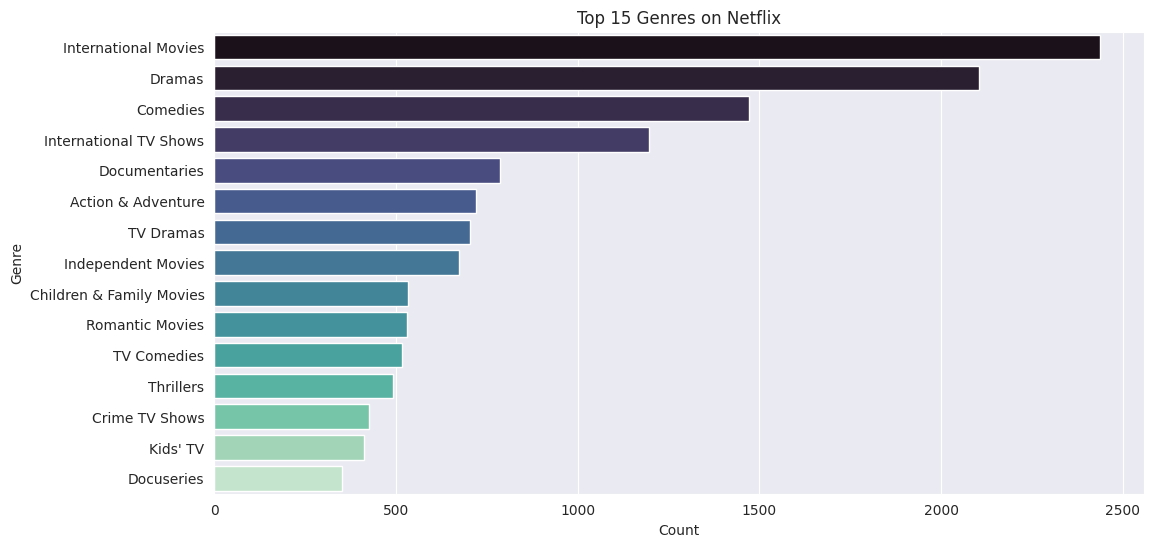

In [78]:
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y='genre',x='count',data=top_genres_counts_plot,palette='mako',hue='genre',legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Insight: "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

**4. Distribution of content duration**



In [79]:
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [80]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

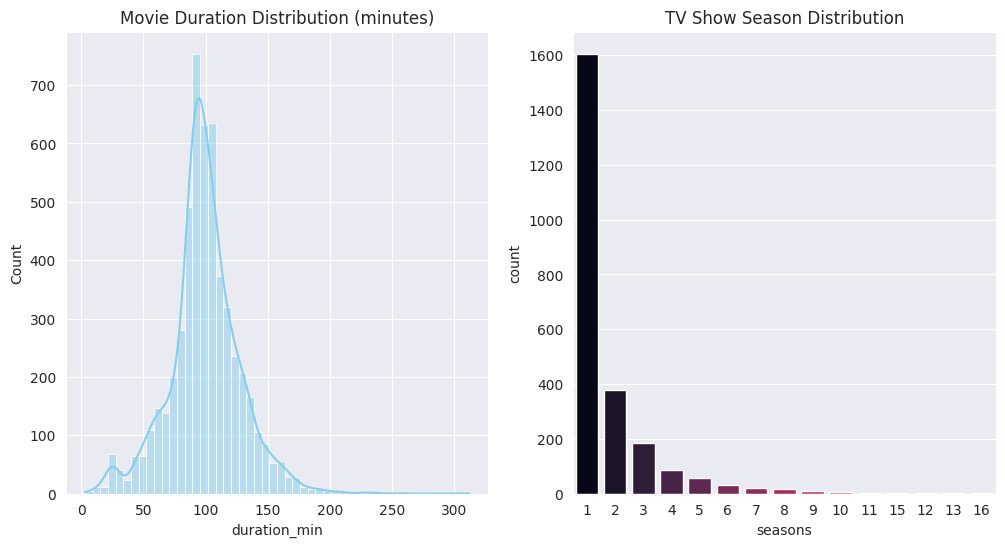

In [81]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [82]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [83]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

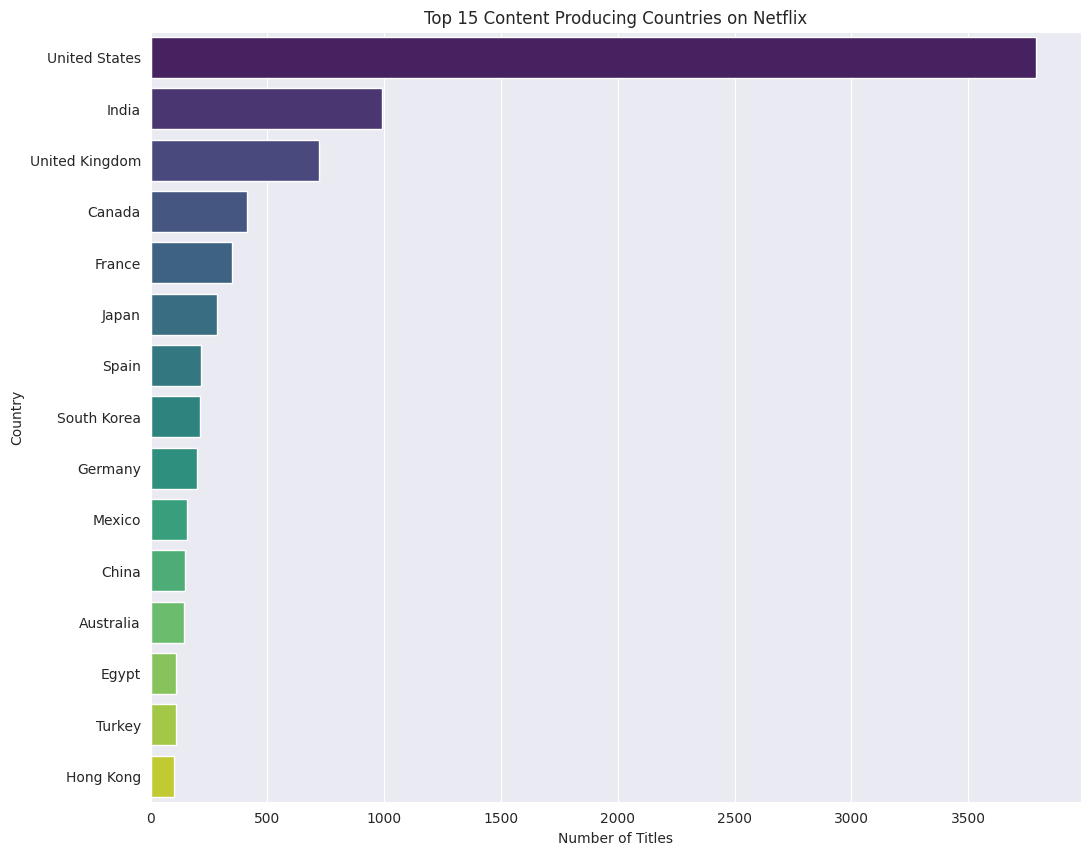

In [84]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

Insight: The United States overwhelmingly dominates Netflix’s content production, followed by India and the United Kingdom, highlighting a strong Western and South Asian influence in the platform’s library.

**5. Maturity ratings of the content**

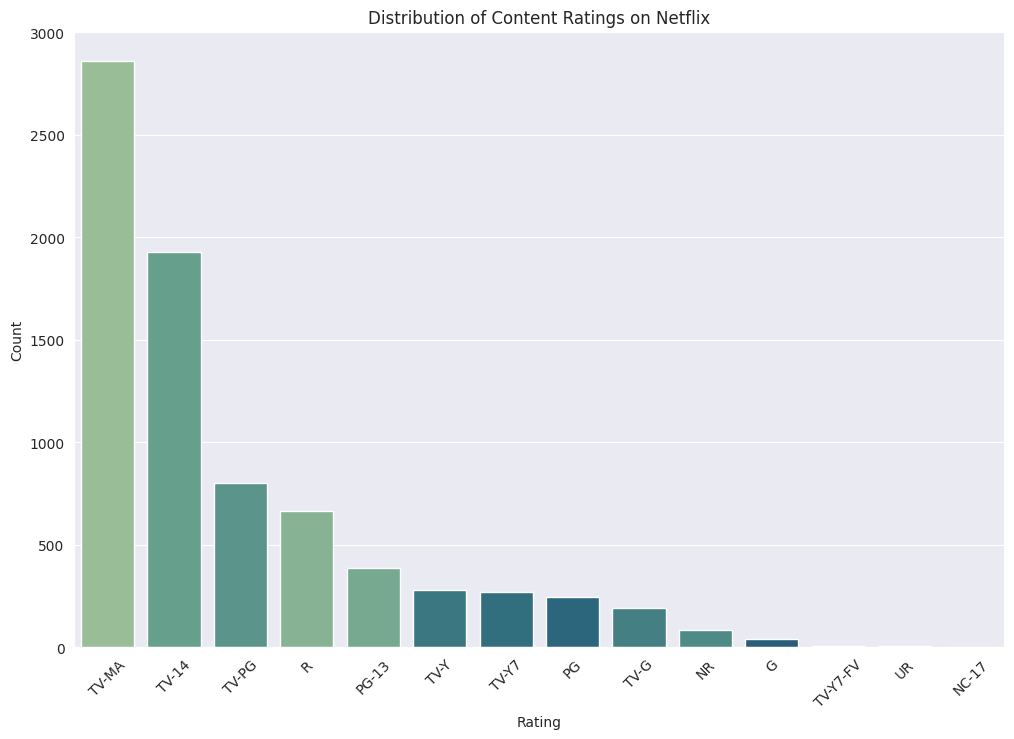

In [85]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insight: A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

# **Feature Engineering**

In [86]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5833,s5834,Movie,Strange Weather,Katherine Dieckmann,"Holly Hunter, Carrie Coon, Kim Coates, Shane J...",United States,2017-10-26,2016,R,91 min,"Dramas, Independent Movies",A grieving mother takes a road trip with her f...,2017,10
551,s552,Movie,Anthony Jeselnik: Thoughts and Prayers,Adam Dubin,Anthony Jeselnik,United States,2015-10-16,2015,TV-MA,59 min,Stand-Up Comedy,There's no subject too dark as the comedian sk...,2015,10
3348,s3349,Movie,Kevin Hart's Guide to Black History,Tom Stern,"Kevin Hart, Saniyya Sidney, Lil Rel Howery, Eo...",United States,2019-02-08,2019,TV-PG,63 min,"Children & Family Movies, Comedies",Kevin Hart highlights the fascinating contribu...,2019,2
2385,s2386,TV Show,Get Organized with The Home Edit,Unknown,Unknown,United States,2020-09-09,2020,TV-PG,1 Season,Reality TV,Expert home organizers Clea and Joanna help ce...,2020,9
1345,s1346,Movie,Chloe,Atom Egoyan,"Julianne Moore, Liam Neeson, Amanda Seyfried, ...","United States, Canada, France",2020-01-01,2009,R,96 min,"Independent Movies, Thrillers","Suspecting her husband of infidelity, Catherin...",2020,1


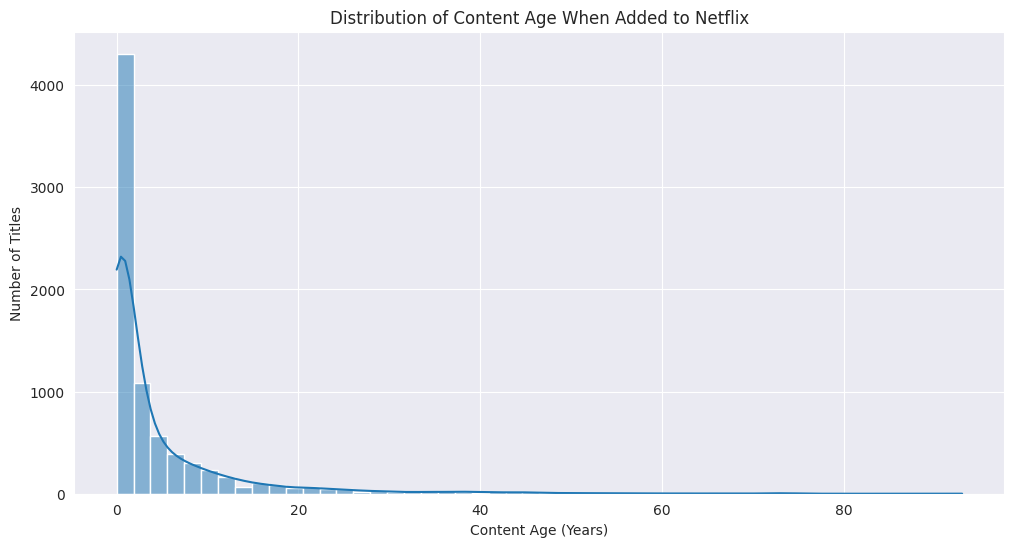

In [87]:
df['age_on_netflix'] = df['year_added'] - df['release_year']

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(12, 6))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

Insight: The large spike at 0 indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

# **Multivariate Analysis**

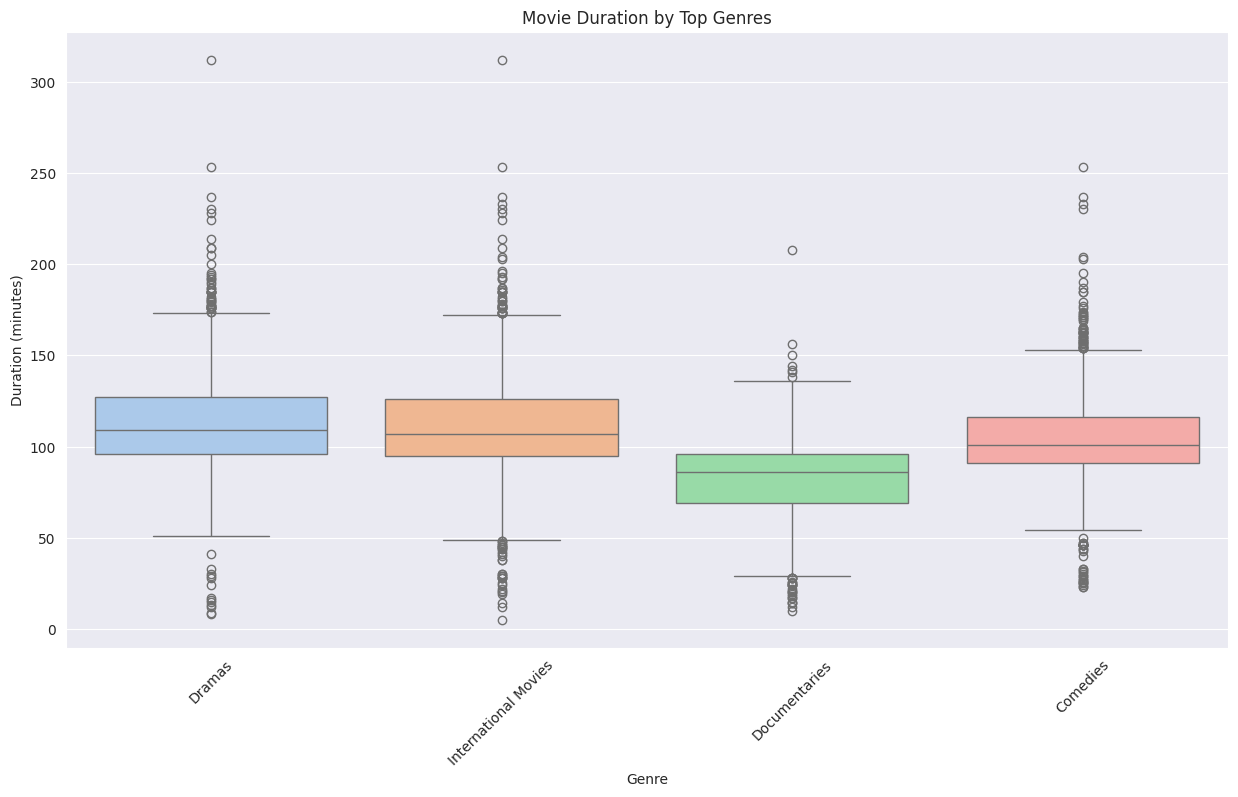

In [88]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

Insight: While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

**Word Cloud from Content Descriptions**

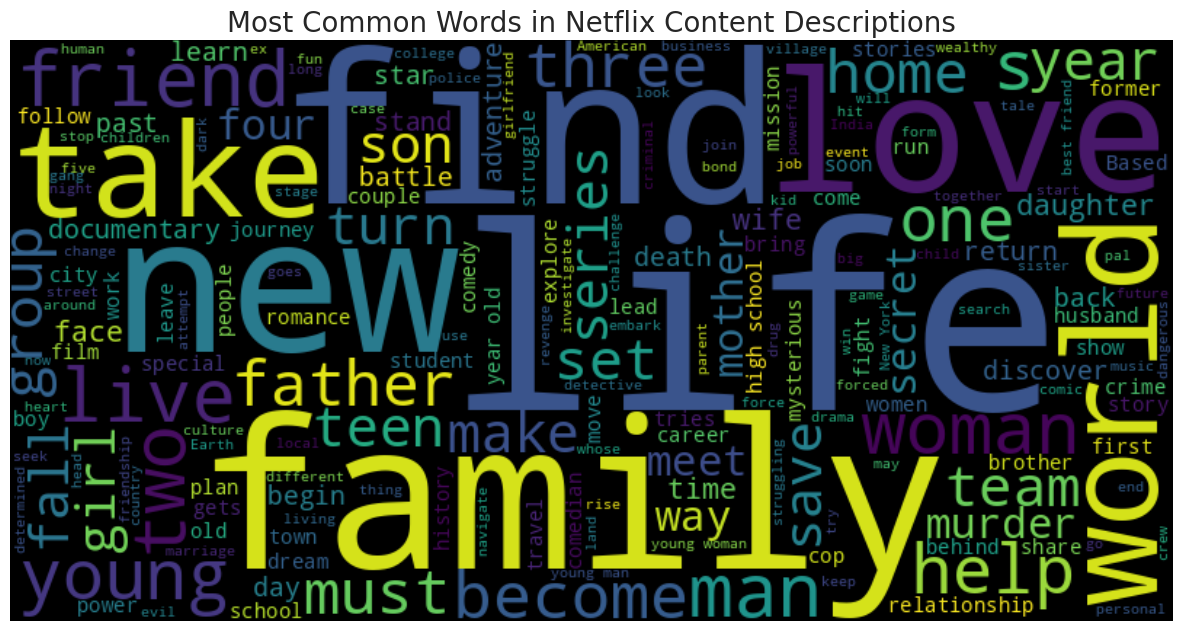

In [89]:
from wordcloud import WordCloud

# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.



## **How has the distribution of content ratings changed over time?**


Group the DataFrame by 'year_added' and 'rating', then count the occurrences of each group and unstack the 'rating' level to get ratings as columns. Finally, fill any NaN values with 0.



In [90]:
ratings_over_time = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)
ratings_over_time.head()

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,5,0,3,5,0,0,0,0
2012,0,0,0,1,0,1,0,0,0,1,0,0,0,0


<Figure size 1200x700 with 0 Axes>

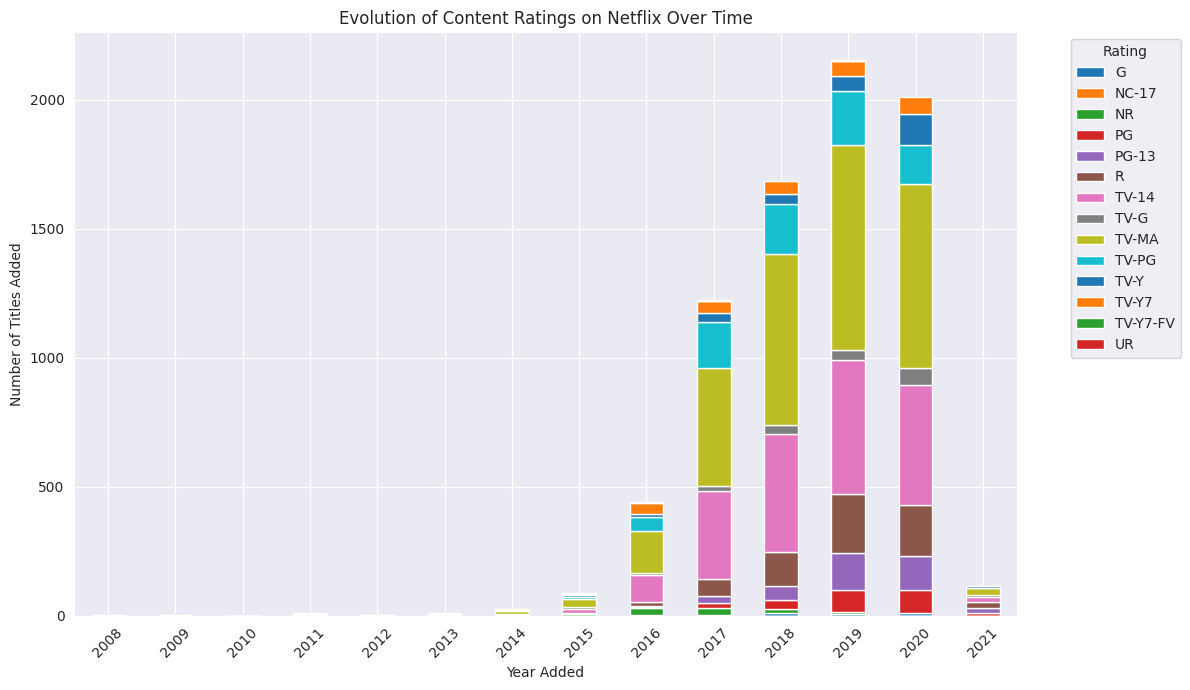

In [91]:
plt.figure(figsize=(12, 7))
ratings_over_time.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Evolution of Content Ratings on Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight: The stacked bar chart vividly illustrates the increasing volume of content added to Netflix over the years, peaking around 2019. It also shows a significant increase in content rated TV-MA and TV-14, especially in later years, indicating a strategic shift towards more mature audiences. While other ratings like PG-13, R, and various TV-Y/G/PG categories are present, their volume is considerably lower compared to the mature ratings. This trend suggests Netflix's focus on catering to adult viewers with a diverse range of series and movies.

## **Is there a relationship between content age and its type (Movie vs. TV Show)?**

Filter the main DataFrame `df` to include only rows where 'age_on_netflix' is non-negative, as instructed. This ensures we are working with valid content age data.



In [92]:
valid_content_age_df = df[df['age_on_netflix'] >= 0].copy()
print("Shape of valid_content_age_df:", valid_content_age_df.shape)
valid_content_age_df.head()

Shape of valid_content_age_df: (7758, 15)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [93]:
movies_content_age = valid_content_age_df[valid_content_age_df['type'] == 'Movie'].copy()
tv_shows_content_age = valid_content_age_df[valid_content_age_df['type'] == 'TV Show'].copy()

print("Shape of movies_content_age:", movies_content_age.shape)
print("Shape of tv_shows_content_age:", tv_shows_content_age.shape)

movies_content_age.head()
tv_shows_content_age.head()

Shape of movies_content_age: (5370, 15)
Shape of tv_shows_content_age: (2388, 15)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,0
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,0
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,1


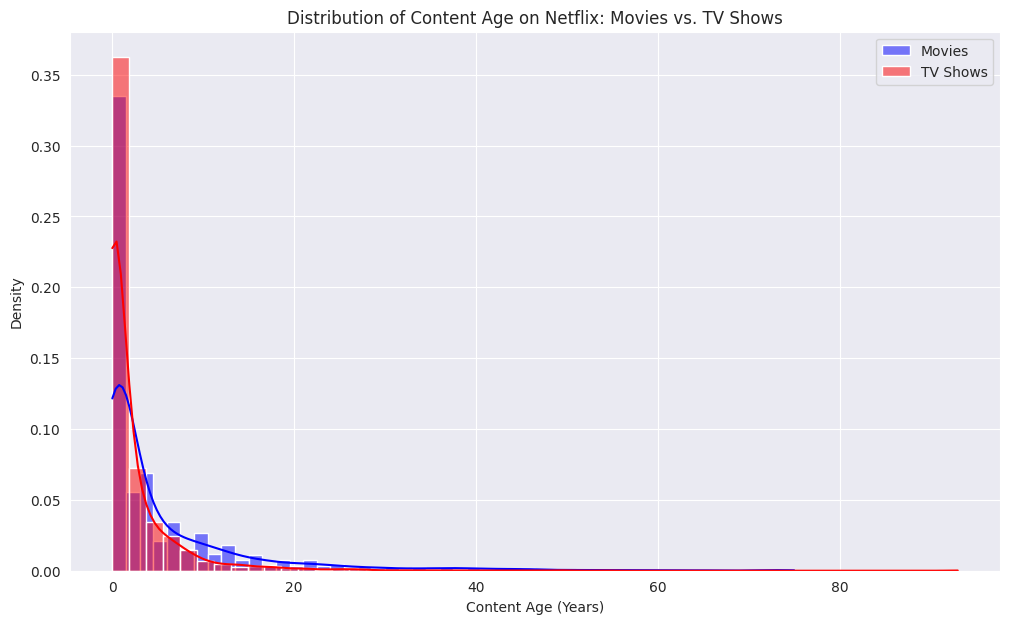

In [94]:
plt.figure(figsize=(12, 7))
sns.histplot(data=movies_content_age, x='age_on_netflix', bins=50, kde=True, color='blue', label='Movies', stat='density')
sns.histplot(data=tv_shows_content_age, x='age_on_netflix', bins=50, kde=True, color='red', label='TV Shows', stat='density')
plt.title('Distribution of Content Age on Netflix: Movies vs. TV Shows')
plt.xlabel('Content Age (Years)')
plt.ylabel('Density')
plt.legend()
plt.show()

Insight: Netflix's content strategy appears to prioritize fresh movie releases, while maintaining a broader library of TV shows that includes both new and older titles, potentially catering to different viewing habits (e.g., binge-watching older series).

## **Identify any trends in content production based on the release year vs. the year added to Netflix**

To analyze how the average age of content added to Netflix has changed over time, group the `valid_content_age_df` DataFrame by `year_added` and then calculate the mean of the `age_on_netflix` column for each year.



In [95]:
average_age_over_time = valid_content_age_df.groupby('year_added')['age_on_netflix'].mean().reset_index()
print("Average age of content added to Netflix over time:")
print(average_age_over_time.head())

Average age of content added to Netflix over time:
   year_added  age_on_netflix
0        2008        1.500000
1        2009        1.000000
2        2010       23.000000
3        2011       19.923077
4        2012        1.000000


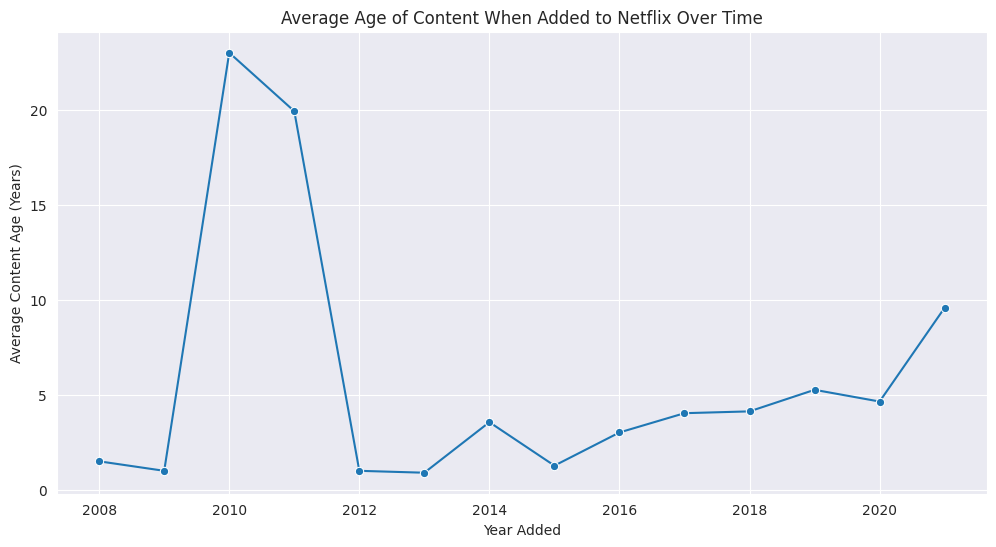

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_age_over_time, x='year_added', y='age_on_netflix', marker='o')
plt.title('Average Age of Content When Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Content Age (Years)')
plt.grid(True)
plt.show()

Insight: The line plot shows fluctuations in the average age of content added to Netflix. In the early years, there's a high variability, likely due to a smaller number of titles being added. In later years, particularly from around 2016-2020, the average age of content added tends to be relatively lower (closer to 5 years), suggesting a focus on newer releases. However, there's a notable increase in the average age of content added in 2021, which could indicate a strategy to acquire more older, classic titles or fill gaps in their library. This trend highlights Netflix's dynamic content acquisition strategy, balancing new productions with a diverse back catalog.

## **What are the most common word pairs or phrases in content descriptions?**

Import the necessary NLTK libraries for tokenization and stop word removal, and download the 'punkt' and 'stopwords' corpora.



In [97]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
print("Downloading 'punkt' tokenizer data...")
nltk.download('punkt', quiet=True)
print("'punkt' tokenizer data downloaded.")

print("Downloading 'stopwords' corpus...")
nltk.download('stopwords', quiet=True)
print("'stopwords' corpus downloaded.")

print("NLTK libraries imported and data downloaded successfully.")

'punkt' tokenizer data downloaded.
'stopwords' corpus downloaded.
NLTK libraries imported and data downloaded successfully.


In [98]:
print(f"All content descriptions combined into a single string with length: {len(text)} characters.")

All content descriptions combined into a single string with length: 1119666 characters.


In [99]:
print("Downloading 'punkt_tab' corpus as suggested by error...")
nltk.download('punkt_tab', quiet=True)
print("'punkt_tab' corpus downloaded.")

words = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))

# Filter out stopwords and non-alphabetic tokens
words = [word for word in words if word.isalpha() and word not in stop_words]

print(f"Number of processed words after tokenization and stop word removal: {len(words)}")
print(f"First 10 processed words: {words[:10]}")

'punkt_tab' corpus downloaded.
Number of processed words after tokenization and stop word removal: 107717
First 10 processed words: ['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one']


**Reasoning**:
Now that the text has been preprocessed into a list of individual words, the next step is to generate bi-grams (word pairs) from this list to identify common phrases. Use the `nltk.collocations` module and `collections.Counter` to find and count these bi-grams.



In [100]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from collections import Counter

# Create a BigramCollocationFinder object
bigram_measures = BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(words)

# Get the top 15 most frequent bigrams
top_15_bigrams = Counter(bigram_finder.ngram_fd).most_common(15)

print("Top 15 Most Common Word Pairs (Bi-grams):")
for bigram, count in top_15_bigrams:
    print(f"{bigram}: {count}")

Top 15 Most Common Word Pairs (Bi-grams):
('high', 'school'): 131
('young', 'man'): 105
('young', 'woman'): 98
('new', 'york'): 86
('best', 'friend'): 50
('true', 'story'): 49
('best', 'friends'): 45
('world', 'war'): 44
('based', 'true'): 42
('documentary', 'follows'): 38
('los', 'angeles'): 38
('falls', 'love'): 37
('war', 'ii'): 36
('york', 'city'): 35
('around', 'world'): 35


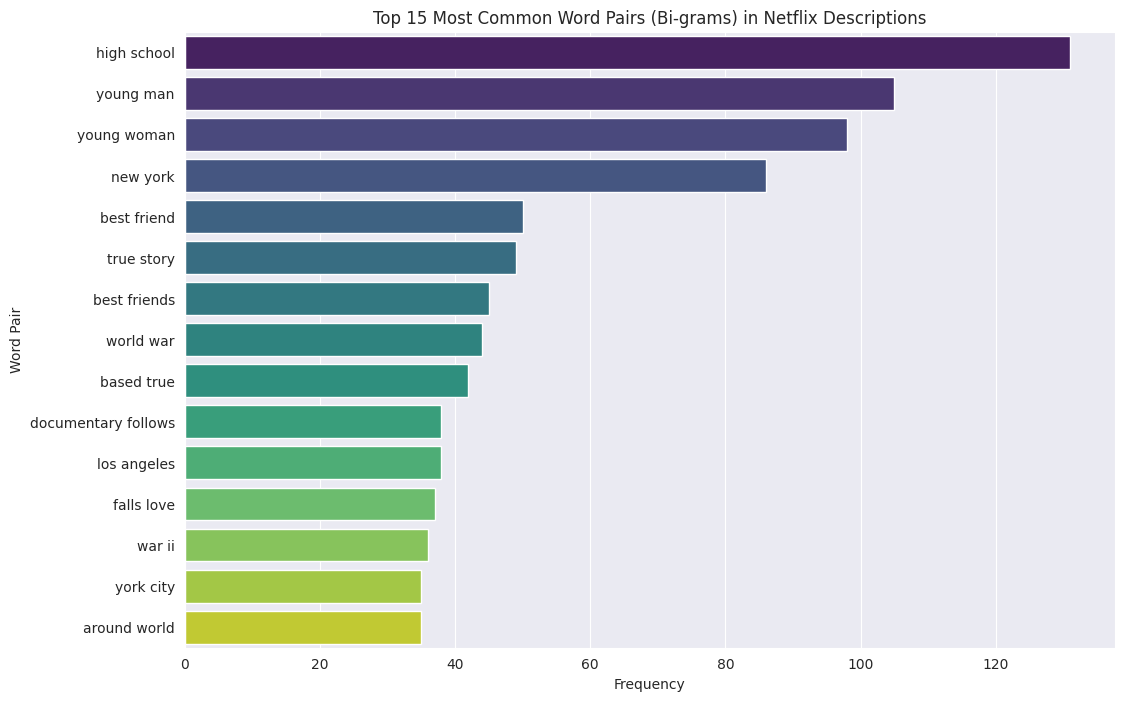

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the list of bigrams and their counts to a DataFrame for plotting
bigram_df = pd.DataFrame(top_15_bigrams, columns=['bigram', 'count'])

# Convert bigram tuples to strings for better readability on the plot
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 8))
sns.barplot(y='bigram', x='count', data=bigram_df, palette='viridis', hue='bigram', legend=False)
plt.title('Top 15 Most Common Word Pairs (Bi-grams) in Netflix Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word Pair')
plt.show()

Insight: The analysis of common word pairs (bi-grams) in Netflix content descriptions reveals recurring themes and narrative elements. Phrases like "high school", "young man", and "young woman" suggest a significant portion of content focuses on coming-of-age stories, youth-centric dramas, or character development around these age groups. The appearance of "new york" and "los angeles" indicates popular urban settings for these stories. Furthermore, bi-grams such as "best friend", "true story", "based true", and "falls love" point to strong themes of relationships, authenticity, and romance. "World war" and "war ii" show a presence of historical or conflict-related narratives. These common bi-grams help in understanding the thematic landscape of Netflix's content library, highlighting prevalent story tropes and audience interests.

# **Who are the top directors on Netflix?**

First, filter out entries where the 'director' is 'Unknown' to focus on identified directors. Then, count the occurrences of each director and select the top 10. Finally, display these top directors.

In [102]:
filtered_directors = df[df['director'] != 'Unknown']
top_directors = filtered_directors['director'].value_counts().head(10).reset_index()
top_directors.columns = ['director', 'count']

print("Top 10 Directors on Netflix:")
display(top_directors)

Top 10 Directors on Netflix:


,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Jay Chapman,12
6,Youssef Chahine,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Lance Bangs,8


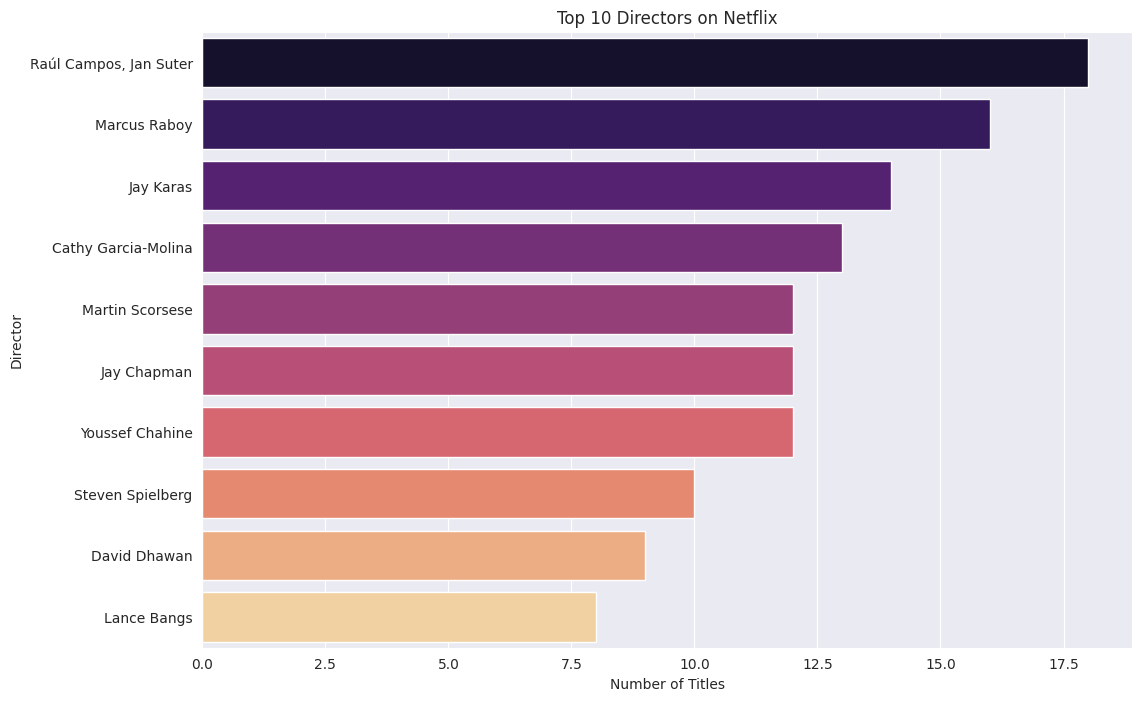

In [103]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='director', data=top_directors, palette='magma', hue='director', legend=False)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

Insight: The analysis of top directors reveals that individuals like Raúl Campos, Jan Suter, and Marcus Raboy have a significant presence on Netflix with a high number of titles. This suggests that Netflix either frequently collaborates with these directors or acquires a substantial amount of content they have directed. This could indicate a strategic focus on their filmmaking style, genre expertise, or a proven track record of audience engagement, leading to a concentrated effort in certain creative partnerships.

